## Single Linear Regression

### import required package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### read data from source and describing

In [2]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
print(df.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


In [4]:
print(df.describe())

       YearsExperience         Salary
count        33.000000      33.000000
mean          5.921212   82760.303030
std           3.342413   34014.620992
min           1.100000   37731.000000
25%           3.200000   56957.000000
50%           5.100000   67938.000000
75%           8.700000  109431.000000
max          13.000000  156000.000000


### check the relation between variables

In [5]:
corr = np.corrcoef(df['YearsExperience'], df['Salary'])
print(corr[0,1])

0.9836422753186337


### EDA

Text(0.5, 1.0, 'Exp vs Salary')

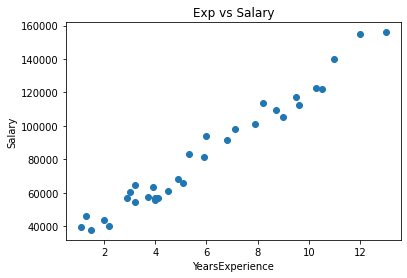

In [6]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Exp vs Salary')


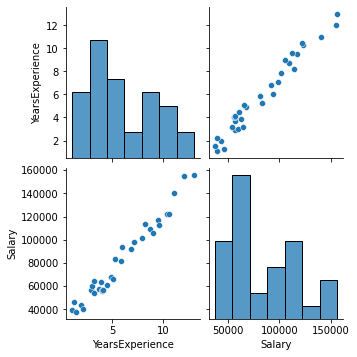

In [7]:
sns.pairplot(df)

### select input and op variable

In [8]:
x = df.drop('Salary', axis=1)
y = df['Salary']


### data clensing operation

In [9]:
## chec for data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  33 non-null     float64
 1   Salary           33 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 656.0 bytes
None


In [10]:
## check for missing values
print(df.isna().sum())

YearsExperience    0
Salary             0
dtype: int64


### split the data


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 12345, train_size= 0.8)

### creating a model

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
## fir the data
model.fit(x_train, y_train)

LinearRegression()

### evaluate the model

In [14]:
score = model.score(x_train, y_train)
print(score)

0.9616652695775537


### parameters to fine tune model

In [15]:
print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


### predict the values for unseen data

In [16]:
y_prediction = model.predict(x_test)
print(y_prediction)

[110063.60259318 105083.05929823  34359.3445099  132974.10174997
  43324.32244081  72211.47355154 126001.34113703]


### predict the values

In [17]:
sal = model.predict([[14]]) ## salary of person havinf 14 yr experience
print(sal[0])

162857.3615196879


### evaluation of loss functions

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_prediction)
n = len(y_test)
k = 1
adjusted_R2 = 1 - ((1 - R2) * ((n -1)/(n - (k + 1))))

print(MAE)
print(MSE)
print(RMSE)
print(R2)
print(adjusted_R2)


4207.941326121617
26018867.269139413
5100.869266030978
0.9812246907643513
0.9774696289172216


### visualization of the model

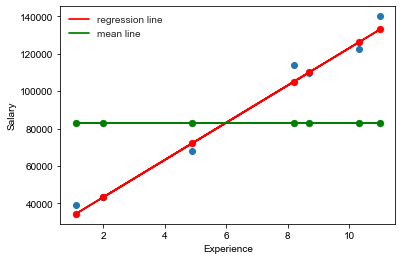

In [19]:
%matplotlib inline
plt.scatter(x_test, y_test)
plt.style.use('seaborn')
plt.scatter(x_test, y_prediction, c = 'red')
plt.plot(x_test, y_prediction, label = 'regression line', c= 'red')
y_mean = np.ones(len(y_test)) * y.mean()
plt.scatter(x_test, y_mean, c= 'green',)
plt.plot(x_test, y_mean, c = 'green', label = 'mean line')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()